In [132]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Exercising $\chi^2$ Analysis

In this notebook we're going to do some simple explorations of using $\chi^2$ as a tool for evaluating goodness of fit.

We're going to be using Pearson's $\chi^2$ test in which we have predictions $\nu_i$ and observations $d_i$.  As an example, this could be histogrammed data with each value representing bin $i$, it could be sampled data where each value represents sample $i$, or it could represent results from multiple independent experiments for a similar observable.

$$\chi^2 = \sum_i^N {(d_i - \nu_i)^2 \over \nu_i} $$

For Poisson-distributed data, we recall that the variance of the distribution is equal to the mean of the distribution: $V = \sigma^2 = \nu$.  Thus, one could envision this calculuation in the $\chi^2$ function as evaluating the data's deviation from the expectation in units of one standard deviation.  The normalized deviations are squared to allow for a cumulative sum that does not include negative values.

We will use a linear function for illustration, but the conclusions will be true for any function.  Let's investigate the behavior of both $\chi^2$ and the p-value of the $\chi^2$ distribution as a function of:

1-- Noise in the sampling process
2-- Varying linear slope and intercept values
3-- Number of data values being sampled
4-- The presence of clear outliers in the data



Observed Chi2:  113.81766983247581
Chi2 PDF Value:  0.015976336145658653
Chi2 CDF Value:  0.8369524462787249
Observed p-value:  0.1630475537212751


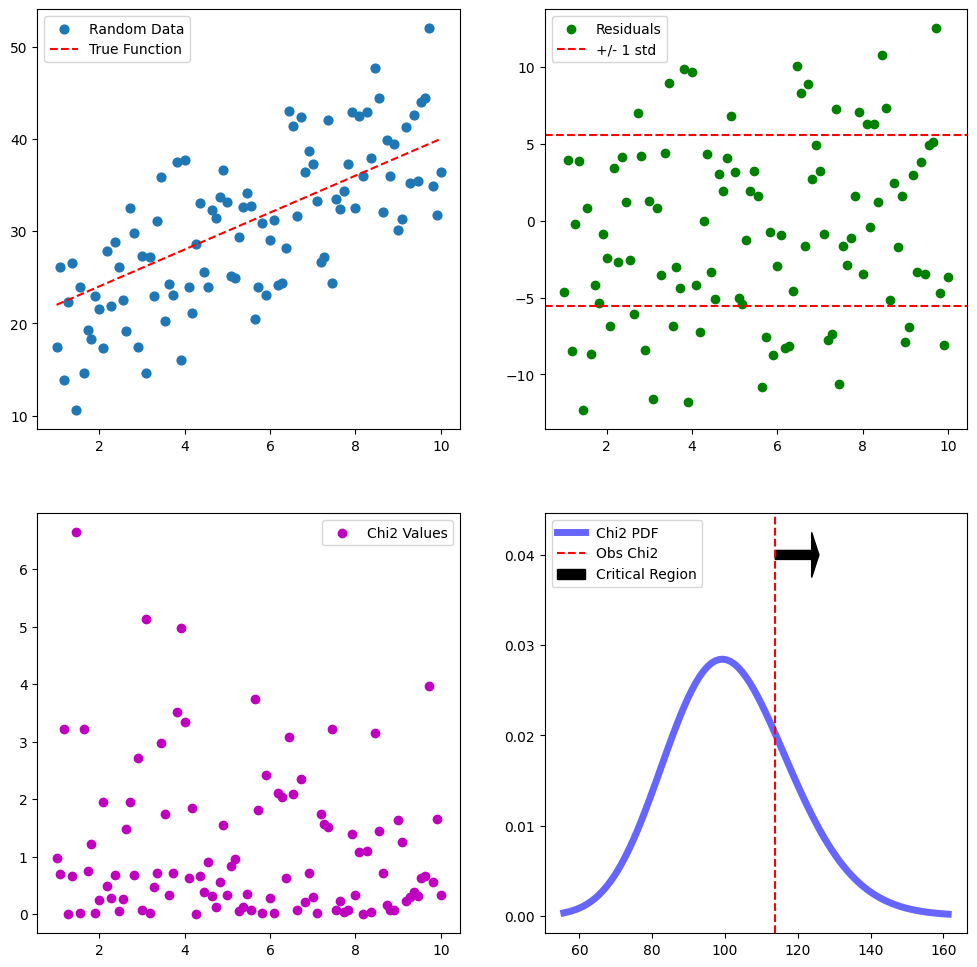

In [205]:
# Make some data!!
# Gonna be a set of noisy data drawn from a linear function
N = 100 # number of points per class
xmin = 1 
xmax = 10
slope = 2
offset = 20
noiseScaleFactor = 1
inject = False

X = np.zeros(N)
y = np.zeros(N)

xline = [xmin,xmax]
yline = [offset+xmin*slope,offset+slope*xmax]

X = np.linspace(xmin,xmax,N)
y_true = slope*X + offset

# We will explore the role that the size of the noise plays
# Why did I choose this value to begin with?
noise = np.sqrt(np.mean(y_true))*noiseScaleFactor

y = slope*X + offset + np.random.randn(N)*noise

if inject:
    y[int(N/2)] *= 2
    y[int(N/2)+1] *= 2



# Calculate data!
deltaYvals = y - y_true  # Residuals
chi2vals = deltaYvals*deltaYvals/y_true # (d-y)^2/y

obsChi2 = np.sum(chi2vals) # sum over array
pdfValue = stats.chi2.pdf(obsChi2,N) # What's the value of the Chi2 PDF at this observed chi2
cdfValue = stats.chi2.cdf(obsChi2,N)
pValue = 1-cdfValue

print("\nObserved Chi2: ",obsChi2)
print("Chi2 PDF Value: ",pdfValue)
print("Chi2 CDF Value: ",cdfValue)
print("Observed p-value: ",pValue)

fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(12,12))

axs[0,0].scatter(X, y, s=40, label = "Random Data")
axs[0,0].plot(xline,yline,linestyle="--",color="r", label="True Function")
axs[0,0].legend()

axs[0,1].scatter(X,deltaYvals,label = "Residuals",c='g')
axs[0,1].axhline(y=noise,color='r',linestyle="--",label = "+/- 1 std")
axs[0,1].axhline(y=-1*noise,color='r',linestyle="--")
axs[0,1].legend()

axs[1,0].scatter(X,chi2vals,label = "Chi2 Values",color='m')
axs[1,0].legend()

chi2x = np.linspace(stats.chi2.ppf(0.0001, N), stats.chi2.ppf(0.9999, N), 100)
axs[1,1].plot(chi2x, stats.chi2.pdf(x, N),
       'b-', lw=5, alpha=0.6, label='Chi2 PDF')
axs[1,1].axvline(x=obsChi2,c='r',linestyle="--",label = "Obs Chi2")
axs[1,1].arrow(obsChi2, 0.04, 10, 0, head_width=0.005, head_length=2, fc='k', ec='k',label="Critical Region")
axs[1,1].legend()
plt.show()

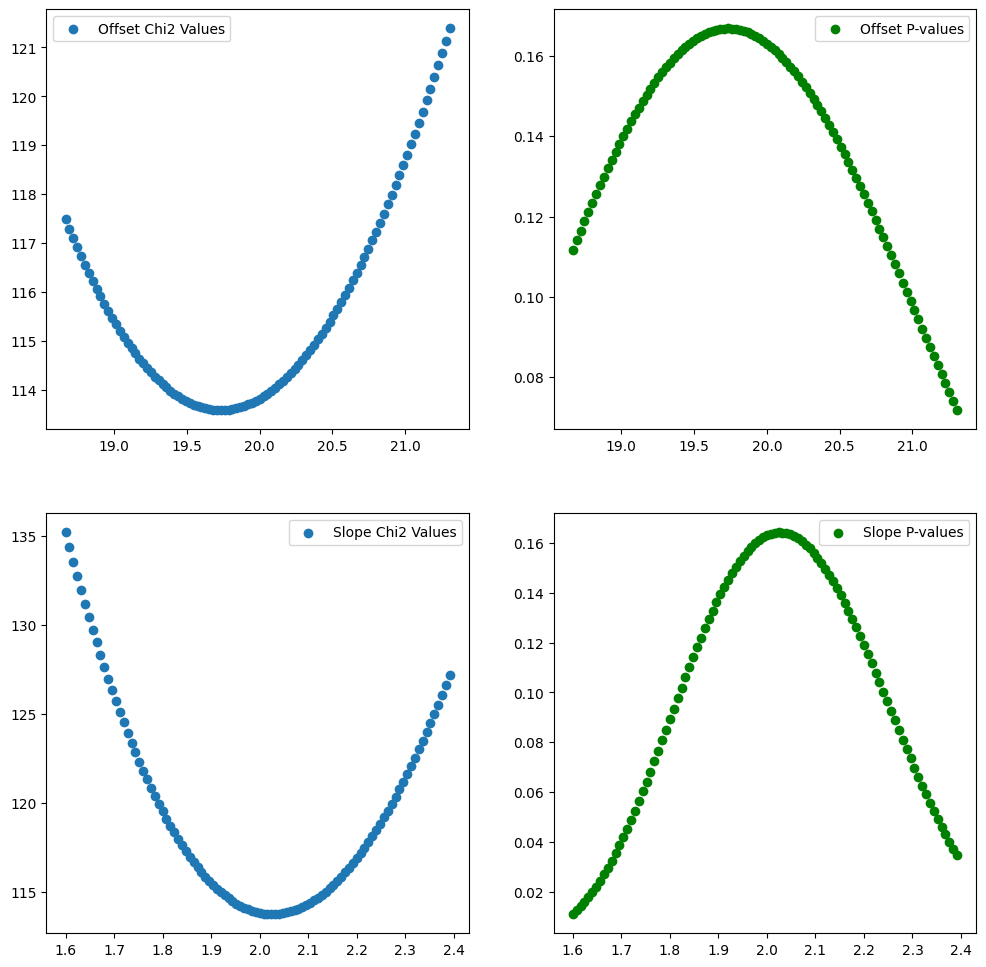

In [206]:
offsetSF = 15
slopeSF = 5

offsetChi2 = []
offsetPval = []
offsetVals = []
for i in range(0,100):
    b = offset-offset/offsetSF + 2*offset/offsetSF/100*i
    offsetVals.append(b)
    y_alt = slope*X + b + 1e-6
    deltaYvals = y - y_alt
    chi2val = np.sum(deltaYvals*deltaYvals/y_alt)
    offsetChi2.append(chi2val)
    offsetPval.append(1-stats.chi2.cdf(chi2val,N))

slopeChi2 = []
slopePval = []
slopeVals = []
for i in range(0,100):
    s = slope-slope/slopeSF + 2*slope/slopeSF/100*i
    slopeVals.append(s)
    y_alt = s*X + offset + 1e-6
    deltaYvals = y - y_alt
    chi2val = np.sum(deltaYvals*deltaYvals/y_alt)
    slopeChi2.append(chi2val)
    slopePval.append(1-stats.chi2.cdf(chi2val,N))

fig, axs2 = plt.subplots(nrows=2,ncols=2,figsize=(12,12))

axs2[0,0].scatter(offsetVals,offsetChi2,label = "Offset Chi2 Values")
axs2[0,0].legend()
axs2[0,1].scatter(offsetVals,offsetPval,label = "Offset P-values",c='g')
axs2[0,1].legend()
axs2[1,0].scatter(slopeVals,slopeChi2,label = "Slope Chi2 Values")
axs2[1,0].legend()
axs2[1,1].scatter(slopeVals,slopePval,label = "Slope P-values",c='g')
axs2[1,1].legend()